## IMPORT ALL THE REQUIRED LIBRARIES:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 


## LOAD THE DATA :

In [2]:
data = pd.read_csv(r"C:\Users\Ruchita\Desktop\vidula\ML_PROJECTS\diabetes.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## SANITY CHECK ON THE DATA:

In [3]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [4]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


# EXPLORATORY DATA ANALYSIS:

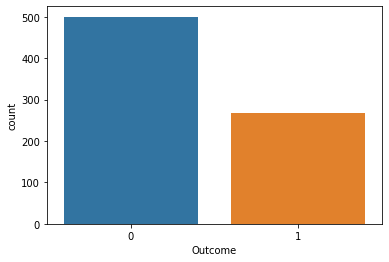

In [6]:
sns.countplot(x='Outcome', data =data)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000D0406E8048>,
      dtype=object)

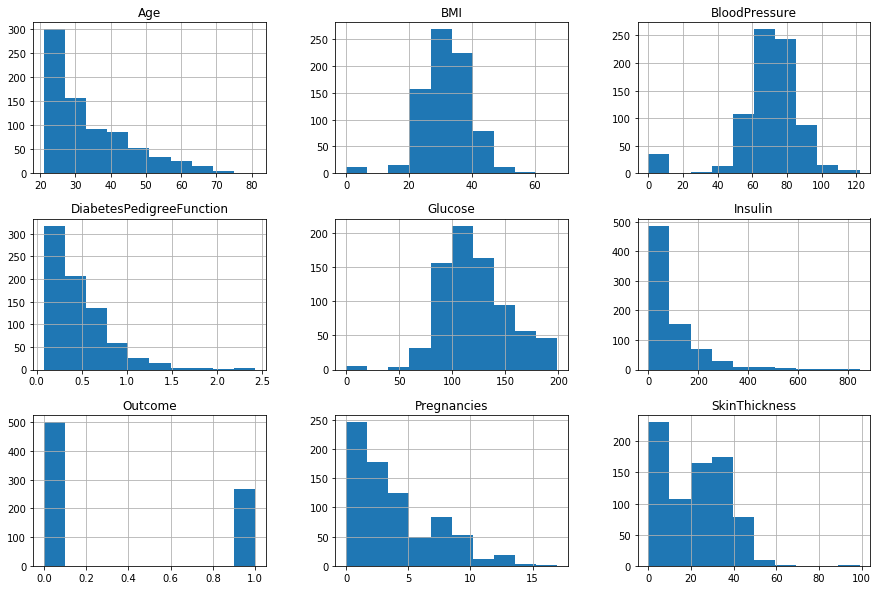

In [10]:
data.hist(figsize=(15,10))

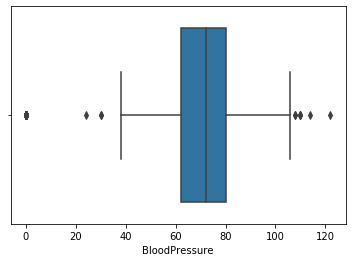

In [11]:
sns.boxplot(x='BloodPressure', data = data)

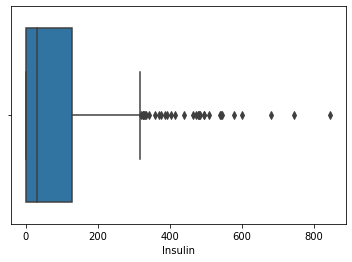

In [12]:
sns.boxplot(x='Insulin', data = data)

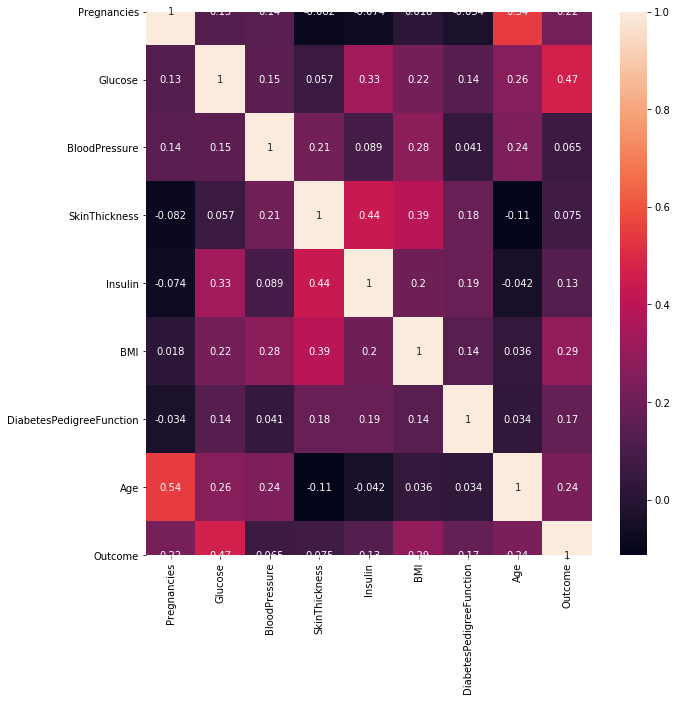

In [44]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),annot = True )

# MODEL BUILDING:

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X= data.drop('Outcome', axis =1)
y = data['Outcome']

In [16]:
X.shape

(768, 8)

In [17]:
y.shape

(768,)

In [18]:
X_train, X_test, y_train , y_test = train_test_split(X,y, test_size = 0.2, random_state =42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)


(614, 8)
(614,)
(154, 8)
(154,)


## STANDARDISATION:

In [19]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# DECISION TREE:

In [23]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state =0, criterion ='gini', )
dt.fit(X_train,y_train)

In [25]:
y_pred = dt.predict(X_test)

In [48]:
from sklearn import metrics
score = metrics.accuracy_score(y_test, y_pred)
print(score*100)

74.67532467532467


# LOGISTIC REGRESSION:

In [29]:
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression()
lg.fit(X_train, y_train)

C:\Users\Ruchita\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [30]:
y_pred_log = lg.predict(X_test)

In [47]:
score = metrics.accuracy_score(y_test, y_pred_log)
print(score*100)

75.32467532467533


# RANDOM FOREST:

In [36]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state = 0, max_depth = 3,n_estimators = 15)
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=3, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=15,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [37]:
y_pred_rf = rf.predict(X_test)

In [46]:
score = metrics.accuracy_score(y_test, y_pred_rf)
print(score*100)

77.27272727272727


### CONCLUSION : Random Forest is performing better (Accuracy Score : 77%)